In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
beta = 0.4
gamma = 0.1
S0 = 990
I0 = 10
R0 = 0
N = S0 + I0 + R0

In [10]:
dt = 0.1
T = 160
t = np.linspace(0, T, int(T/dt) + 1)

In [11]:
def f(S, I, R):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [12]:
S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

S[0] = S0
I[0] = I0
R[0] = R0

In [13]:
for i in range(1, len(t)):
    k1S, k1I, k1R = f(S[i-1], I[i-1], R[i-1])
    k2S, k2I, k2R = f(S[i-1] + k1S * dt / 2, I[i-1] + k1I * dt / 2, R[i-1] + k1R * dt / 2)
    k3S, k3I, k3R = f(S[i-1] + k2S * dt / 2, I[i-1] + k2I * dt / 2, R[i-1] + k2R * dt / 2)
    k4S, k4I, k4R = f(S[i-1] + k3S * dt, I[i-1] + k3I * dt, R[i-1] + k3R * dt)
    
    S[i] = S[i-1] + (dt / 6) * (k1S + 2*k2S + 2*k3S + k4S)
    I[i] = I[i-1] + (dt / 6) * (k1I + 2*k2I + 2*k3I + k4I)
    R[i] = R[i-1] + (dt / 6) * (k1R + 2*k2R + 2*k3R + k4R)

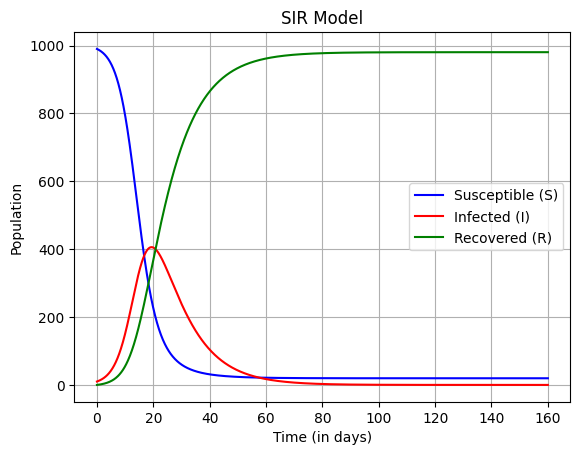

In [14]:
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='green')
plt.xlabel('Time (in days)')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid()
plt.show()